In [806]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [807]:
book_content = pd.read_csv("bestsellers with categories.csv")
book_content.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [808]:
book_content.shape

(550, 7)

In [809]:
#Відповідь: Про скільки книг зберігає дані датасет?

unique = book_content["Name"].nunique()
print("Number of unique books: ", unique)

#Answer: There are 550 lines, but there are some duplicates in it, so there are only 351 unique books included.

Number of unique books:  351


In [810]:
book_content.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
book_content.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [811]:
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
#Answer: No
book_content.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [812]:
unique_genre = book_content["genre"].drop_duplicates()
unique_genre

0    Non Fiction
1        Fiction
Name: genre, dtype: object

In [813]:
#Відповідь: Які є унікальні жанри?
print("Answer: Unique genres are ", unique_genre.tolist())

Answer: Unique genres are  ['Non Fiction', 'Fiction']


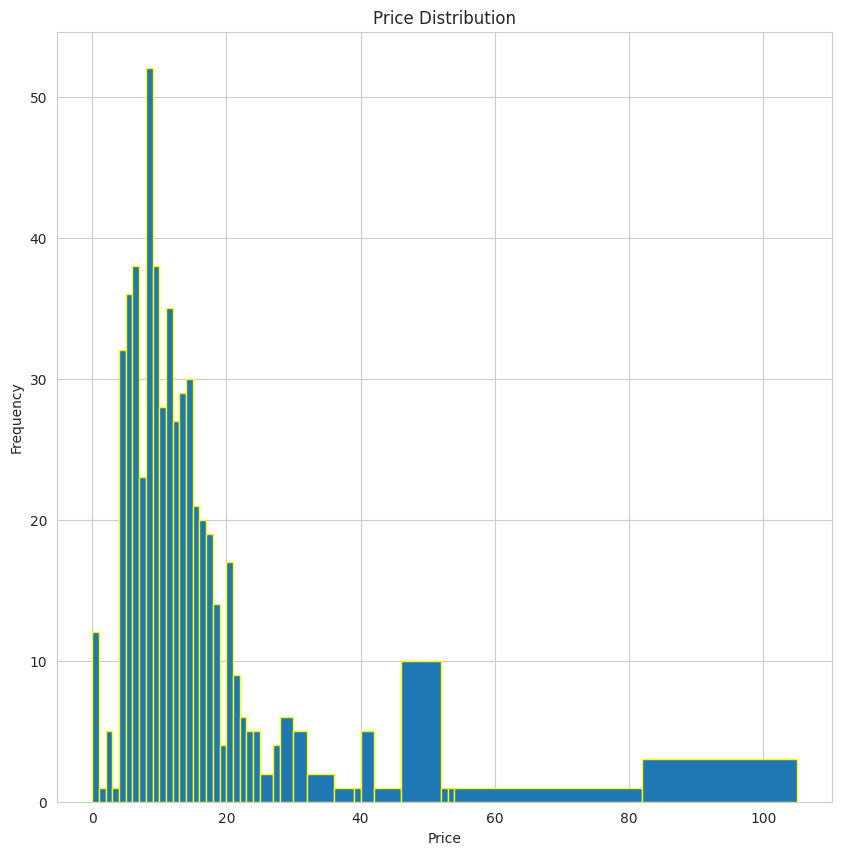

In [814]:
unique_price = sorted(book_content['price'].unique())

book_content['price'].plot(kind='hist', bins=unique_price, edgecolor = 'yellow', figsize=(10,10))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

In [815]:
book_content['price'].agg(["max","min","mean","median"])

max       105.0
min         0.0
mean       13.1
median     11.0
Name: price, dtype: float64

In [816]:
#Відповідь: Максимальна ціна? 105
#Відповідь: Мінімальна ціна? 0.0
#Відповідь: Середня ціна? 13.1
#Відповідь: Медіанна ціна? 11.0

In [817]:
#Відповідь: Який рейтинг у датасеті найвищий? 
print("Відповідь: ", book_content["user_rating"].max())

Відповідь:  4.9


In [818]:
#Відповідь: Скільки книг мають такий рейтинг? Відповідь: 28

print("Number of unique books with rating 4.9: ", book_content[book_content["user_rating"] == 4.9]["name"].nunique() )

Number of unique books with rating 4.9:  28


In [819]:
#Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

book_content.loc[book_content['reviews'].idxmax()]

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [820]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, 
#яка книга найдорожча (можна використати проміжний датафрейм)? 
#Відповідь: 'Publication Manual of the American Psychological Association, 6th Edition'

book_content.loc[book_content[book_content["year"]==2015]["price"].idxmax(), "name"]

'Publication Manual of the American Psychological Association, 6th Edition'

In [821]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
#Відповідь: 20

book_content[(book_content["year"]==2010) & (book_content["genre"]=="Fiction")]['name'].count()


np.int64(20)

In [822]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
#Відповідь: 1
option_one = book_content[(book_content["user_rating"]==4.9) & ((book_content["year"]==2010) | (book_content["year"]==2011))]["name"].count()

option_two = book_content[(book_content["user_rating"]==4.9) & (book_content["year"].isin([2010,2011]))]["name"].count()

print("Answer:", option_one)
print("Answer:", option_two)

Answer: 1
Answer: 1


In [823]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році 
#і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

book_sorted = book_content[(book_content["year"]==2015) & (book_content["price"]< 8)].sort_values(by ="price", ascending=True)

book_sorted

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [824]:
#Відповідь: Яка книга остання у відсортованому списку? 
#Відповідь: Old School (Diary of a Wimpy Kid #10)

print("Відповідь:","\n", book_sorted.iloc[-1, :][["name", "author"]])

Відповідь: 
 name      Old School (Diary of a Wimpy Kid #10)
author                              Jeff Kinney
Name: 253, dtype: object


In [825]:
#Агрегування даних та з'єднання таблиць

In [826]:
book_content.groupby(by= "genre").agg({"price": ["max","min"]})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [827]:
#Відповідь: Максимальна ціна для жанру Fiction: 
#Відповідь: 82

#Відповідь: Мінімальна ціна для жанру Fiction: 
#Відповідь: 0

#Відповідь: Максимальна ціна для жанру Non Fiction: 
#Відповідь: 105

#Відповідь: Мінімальна ціна для жанру Non Fiction: 
#Відповідь: 0

In [828]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). 
#Не беріть усі стовпці, виберете тільки потрібні

author_dataframe = book_content.groupby(by="author").agg({"name":"count"})
author_dataframe.columns = ["quantity_of_books"]
author_dataframe.reset_index(inplace=True)

print(author_dataframe.index)
author_dataframe

RangeIndex(start=0, stop=248, step=1)


,author,quantity_of_books
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [829]:
author_dataframe.shape

(248, 2)

In [830]:
#Відповідь: Якої розмірності вийшла таблиця? 
print("table size: ",author_dataframe.shape)

#Відповідь: Який автор має найбільше книг? 
print("The biggest amount of books has: ", author_dataframe.iloc[author_dataframe.sort_values(by= "quantity_of_books", ascending=False)["quantity_of_books"].idxmax()]["author"])

#Відповідь: Скільки книг цього автора? 
print("The number of his books: ",author_dataframe.iloc[author_dataframe.sort_values(by="quantity_of_books", ascending=False)["quantity_of_books"].idxmax()]["quantity_of_books"])

table size:  (248, 2)
The biggest amount of books has:  Jeff Kinney
The number of his books:  12


In [831]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 
#Не беріть усі стовпці, виберете тільки потрібні

author_rating = book_content.groupby(by="author").agg({"user_rating":"mean"})

author_rating.columns=["mean_user_rating"]
author_rating.reset_index(inplace=True)
author_rating

,author,mean_user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [832]:
#Відповідь: У якого автора середній рейтинг мінімальний? 
print("Author with the lowerst mean rating: ", author_rating.iloc[author_rating["mean_user_rating"].idxmin()]["author"])
#Відповідь: Який у цього автора середній рейтинг? 
print("He has the rating of : ", author_rating.iloc[author_rating["mean_user_rating"].idxmin()]["mean_user_rating"])

Author with the lowerst mean rating:  Donna Tartt
He has the rating of :  3.9


In [833]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
if 'author' in author_dataframe.columns:
    author_dataframe.set_index("author", inplace=True)
if 'author' in author_rating.columns:
    author_rating.set_index("author", inplace=True)
total_authors_info = pd.concat([author_dataframe, author_rating],axis=1)
total_authors_info.reset_index(inplace=True)
total_authors_info

,author,quantity_of_books,mean_user_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [834]:
print(total_authors_info.columns)

Index(['author', 'quantity_of_books', 'mean_user_rating'], dtype='object')


In [835]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
total_authors_info_sorted = total_authors_info.sort_values(["quantity_of_books","mean_user_rating"])
total_authors_info_sorted

,author,quantity_of_books,mean_user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


In [836]:
#Відповідь: Який автор перший у списку?
print("First in the list: ",total_authors_info_sorted.iloc[0,0])

First in the list:  Muriel Barbery


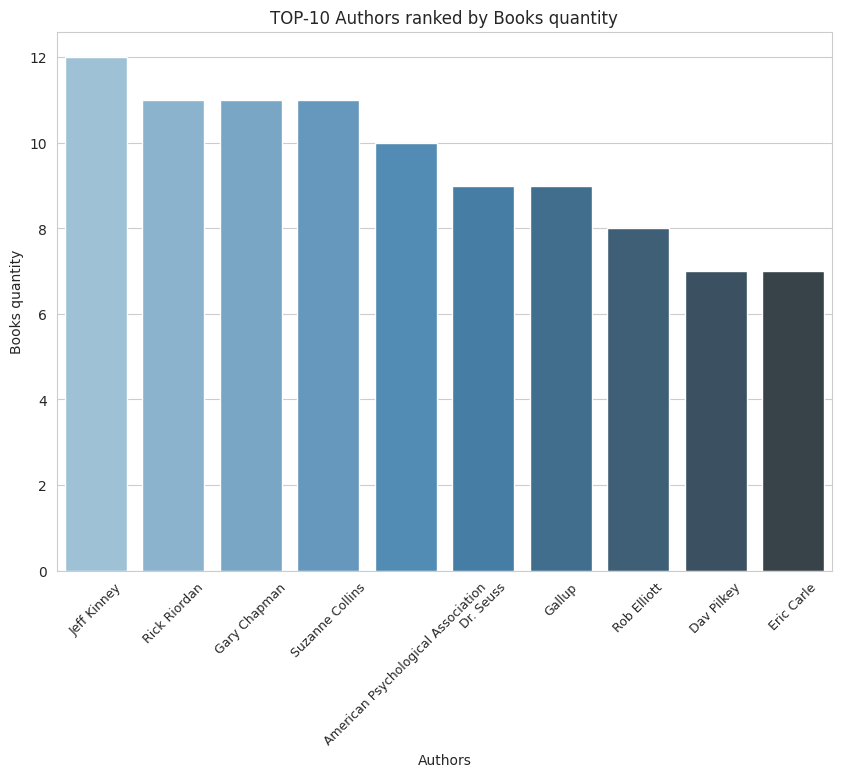

In [837]:
# visualization top-10 Authors rated by books number
import matplotlib.pyplot as plt
import seaborn as sns

total_auth = total_authors_info.sort_values(["quantity_of_books","mean_user_rating"], ascending=False)
top_10_authors = total_auth[0:10]

plt.figure(figsize=(10,7))
sns.barplot(x=top_10_authors["author"], y=top_10_authors["quantity_of_books"], hue=top_10_authors["author"], palette="Blues_d", dodge=False)


plt.xlabel("Authors")
plt.ylabel("Books quantity")
plt.title("TOP-10 Authors ranked by Books quantity")
plt.xticks(rotation=45, fontsize="9")
plt.show()


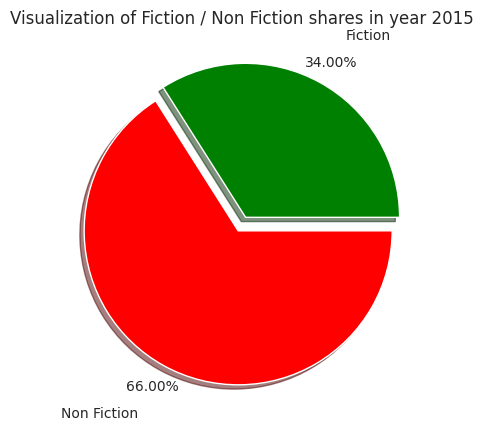

In [838]:
#Visualization of Fiction / Non Fiction shares in 2015 Year
import matplotlib.pyplot as plt

books_2015 = book_content[book_content["year"]==2015].groupby(by="genre").agg({"genre":"count"})

books_2015.columns=["quantity"]
books_2015.reset_index(inplace=True)

labels = books_2015["genre"].tolist()
data = books_2015["quantity"].tolist()
explode= [0.05,0.05]
plt.figure(figsize=(5,5))

plt.pie(data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
    colors=['green', 'red'], )

plt.title("Visualization of Fiction / Non Fiction shares in year 2015")
plt.show()



<Figure size 1000x1000 with 0 Axes>

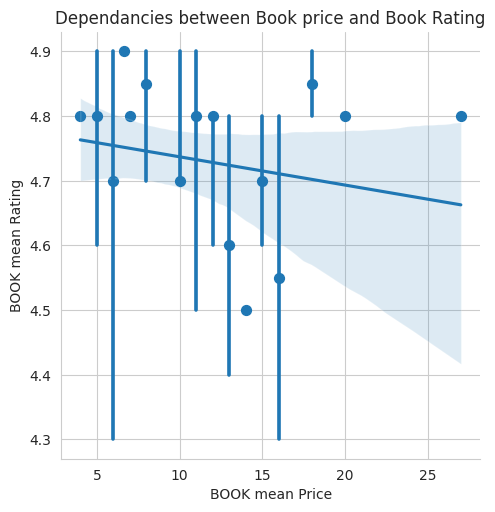

In [851]:
#Visualization of Linear regression
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

set = book_content[book_content["year"]==2019]
price_rating_set = set.groupby(by="author").agg({"user_rating":"mean", "price":"mean" })
price_rating_set.reset_index(inplace=True)

plt.figure(figsize=(10,10))
sns.lmplot(data = price_rating_set, x="price", y="user_rating", x_estimator=median)

plt.xlabel("BOOK mean Price")
plt.ylabel("BOOK mean Rating")
plt.title("Dependancies between Book price and Book Rating")

plt.show()